In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Set display options for pandas tables
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)


In [ ]:
# URLs for the datasets
url1 = "https://raw.githubusercontent.com/kenstare/Practice_datasets/master/home_loan_train.csv"
url2 = "https://raw.githubusercontent.com/kenstare/Practice_datasets/master/home_loan_test.csv


### Phase 1: Data Collection and Preparation

In [8]:
# Task 1.1: Load the datasets
df_train = pd.read_csv(url1)
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:

df_test = pd.read_csv(url2)
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [12]:
# Task 1.2: Inspect the datasets
print("\nTrain Dataset Info:")
print(df_train.info())
print("\nTrain Dataset Missing Values:")
print(df_train.isnull().sum())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Train Dataset Missing Values:
Loan_ID               0
Gender               13
Married

In [13]:
print("\nTrain Dataset Duplicates:", df_train.duplicated().sum())




Train Dataset Duplicates: 0


In [14]:
print("\nTest Dataset Info:")
print(df_test.info())
print("\nTest Dataset Missing Values:")
print(df_test.isnull().sum())


Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None

Test Dataset Missing Values:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education

In [15]:
print("Test Dataset Duplicates:", df_test.duplicated().sum())

Test Dataset Duplicates: 0


### Task 1.3: Clean the datasets

In [16]:
# Task 1.3: Clean the datasets
# Handle missing values
for col in df_train.columns:
    if df_train[col].dtype in ['int64', 'float64']:
        df_train[col].fillna(df_train[col].median(), inplace=True)
    else:
        df_train[col].fillna(df_train[col].mode()[0], inplace=True)

C:\Users\akind\AppData\Local\Temp\ipykernel_23092\3099540074.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].mode()[0], inplace=True)
C:\Users\akind\AppData\Local\Temp\ipykernel_23092\3099540074.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [17]:
for col in df_test.columns:
    if df_test[col].dtype in ['int64', 'float64']:
        df_test[col].fillna(df_test[col].median(), inplace=True)
    else:
        df_test[col].fillna(df_test[col].mode()[0], inplace=True)

C:\Users\akind\AppData\Local\Temp\ipykernel_23092\2802318221.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[col].fillna(df_test[col].mode()[0], inplace=True)
C:\Users\akind\AppData\Local\Temp\ipykernel_23092\2802318221.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [18]:
print("\nMissing Values After Imputation:")
print("Train:", df_train.isnull().sum().sum())
print("Test:", df_test.isnull().sum().sum())


Missing Values After Imputation:
Train: 0
Test: 0


In [19]:
# Correct data types (ensure numerical and categorical types are appropriate)
# Assuming Dependents is categorical (e.g., '0', '1', '2', '3+')
for df in [df_train, df_test]:
    if 'Dependents' in df.columns:
        df['Dependents'] = df['Dependents'].astype(str)

# Handle outliers (cap extreme values for ApplicantIncome and LoanAmount)
for df in [df_train, df_test]:
    df['ApplicantIncome'] = df['ApplicantIncome'].clip(upper=df['ApplicantIncome'].quantile(0.99))
    df['LoanAmount'] = df['LoanAmount'].clip(upper=df['LoanAmount'].quantile(0.99))

### Phase 2: Exploratory Data Analysis (EDA)

In [21]:
# Task 2.1: Descriptive Statistics
print("\nTrain Dataset - Descriptive Statistics:")
print(df_train.describe(include='all'))

print("\nTest Dataset - Descriptive Statistics:")
print(df_test.describe(include='all'))


Train Dataset - Descriptive Statistics:
         Loan_ID Gender Married Dependents Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status
count        614    614     614        614       614           614       614.000000         614.000000  614.000000        614.000000      614.000000           614         614
unique       614      2       2          4         2             2              NaN                NaN         NaN               NaN             NaN             3           2
top     LP001002   Male     Yes          0  Graduate            No              NaN                NaN         NaN               NaN             NaN     Semiurban           Y
freq           1    502     401        360       480           532              NaN                NaN         NaN               NaN             NaN           233         422
mean         NaN    NaN     NaN        NaN       NaN           NaN      5209.602394 

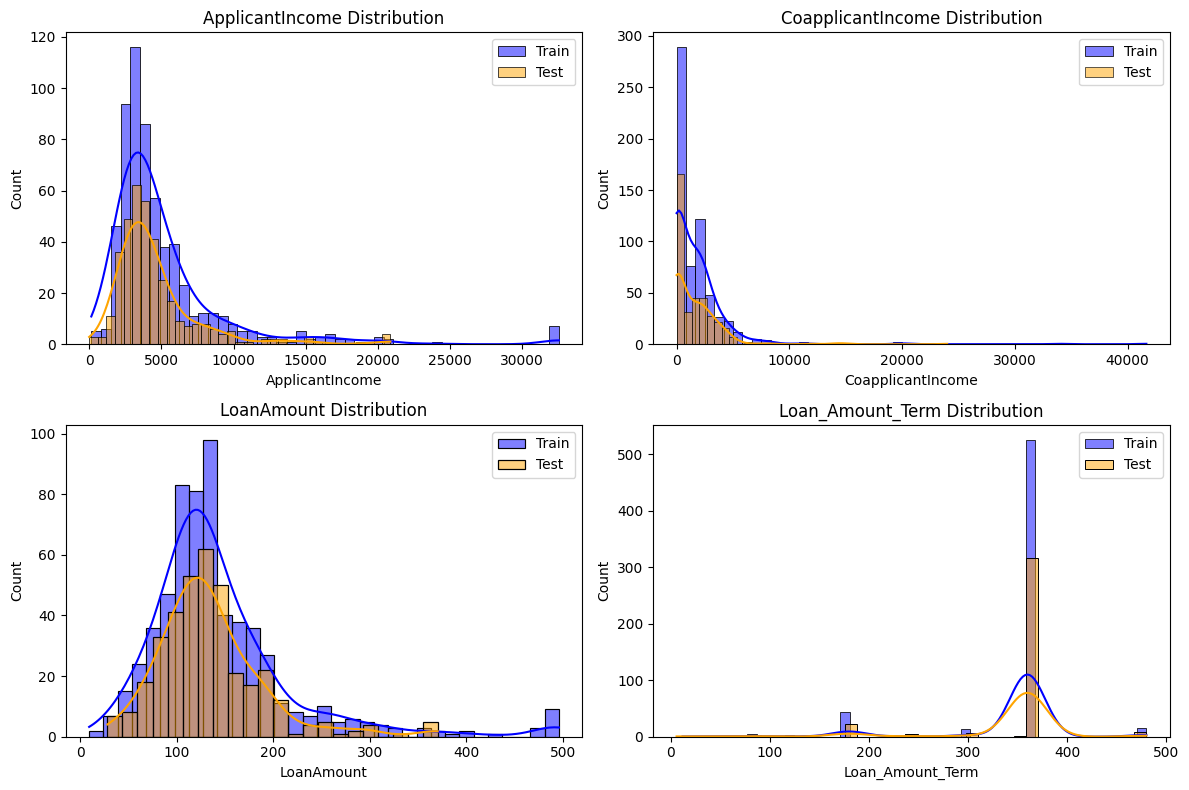

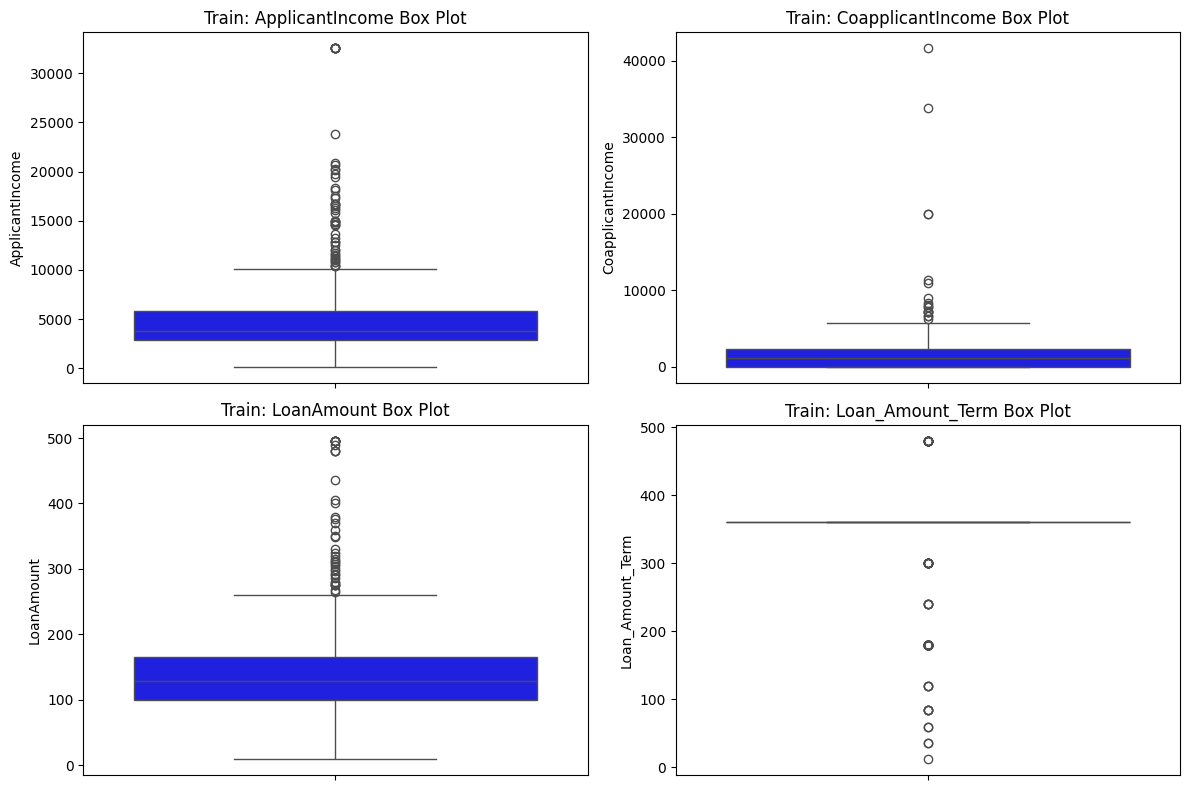

In [22]:
# Task 2.2: Visualize Numerical Features
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[col], kde=True, color='blue', label='Train')
    if col in df_test.columns:
        sns.histplot(df_test[col], kde=True, color='orange', alpha=0.5, label='Test')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.legend()
plt.tight_layout()
plt.show()

# Box plots for numerical features (Train only for clarity)
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_train[col], color='blue')
    plt.title(f'Train: {col} Box Plot')
plt.tight_layout()
plt.show()

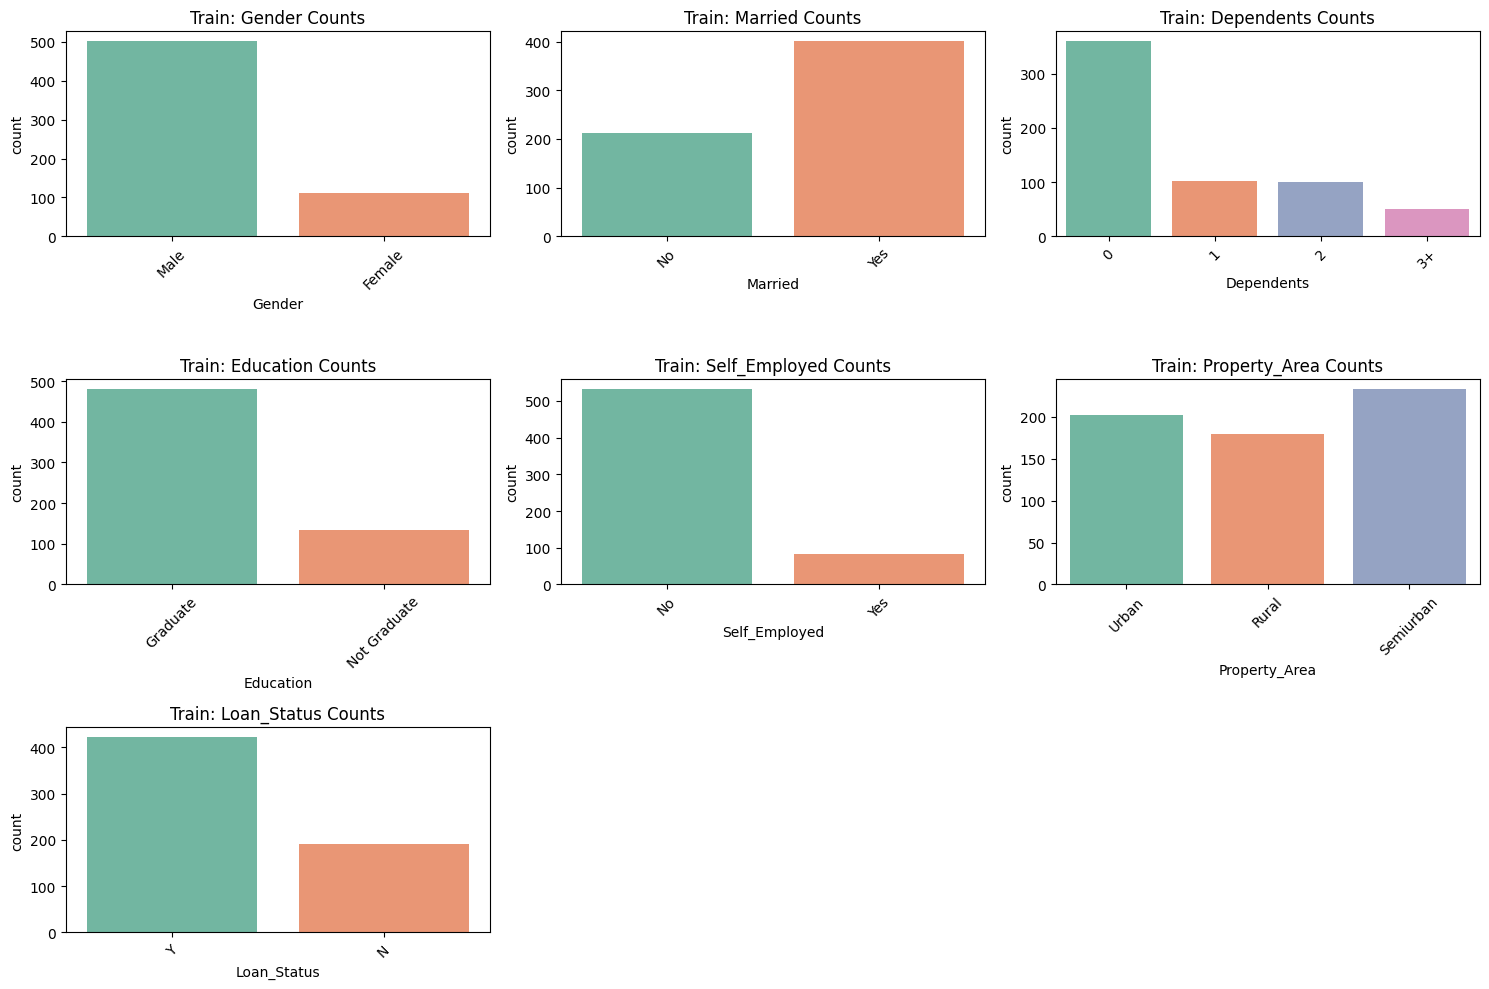

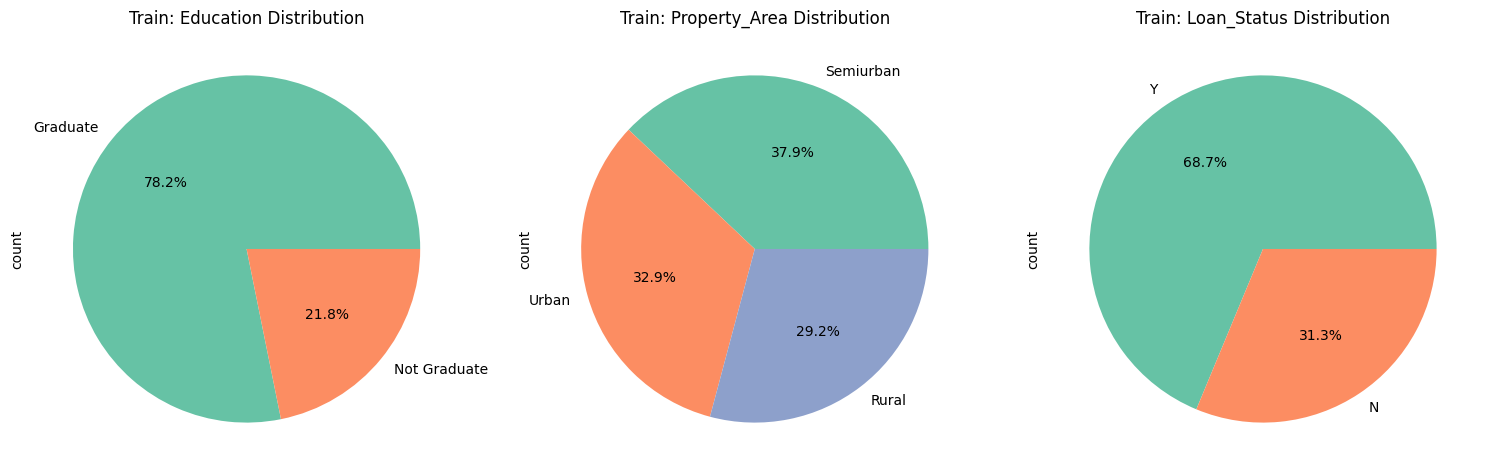

In [23]:
# Task 2.3: Analyze Categorical Features
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
if 'Loan_Status' in df_train.columns:
    categorical_cols.append('Loan_Status')

# Bar charts
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df_train, hue=col, palette='Set2', legend=False)
    plt.title(f'Train: {col} Counts')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie charts for key categorical variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Education', 'Property_Area', 'Loan_Status'], 1):
    plt.subplot(1, 3, i)
    df_train[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Train: {col} Distribution')
plt.tight_layout()
plt.show()


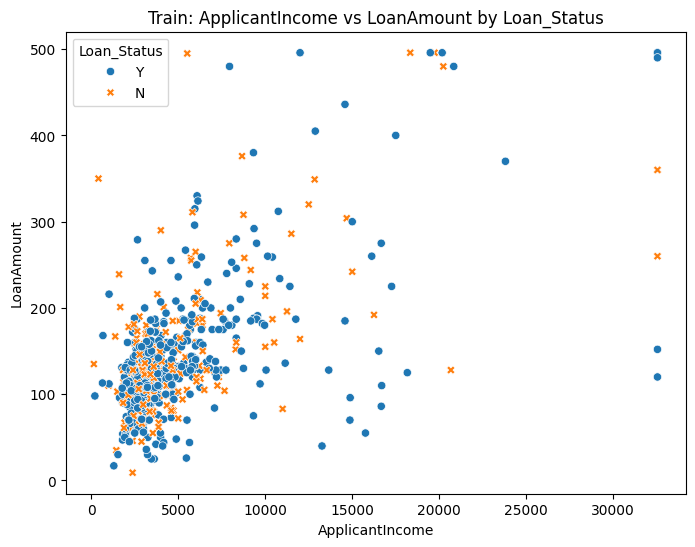

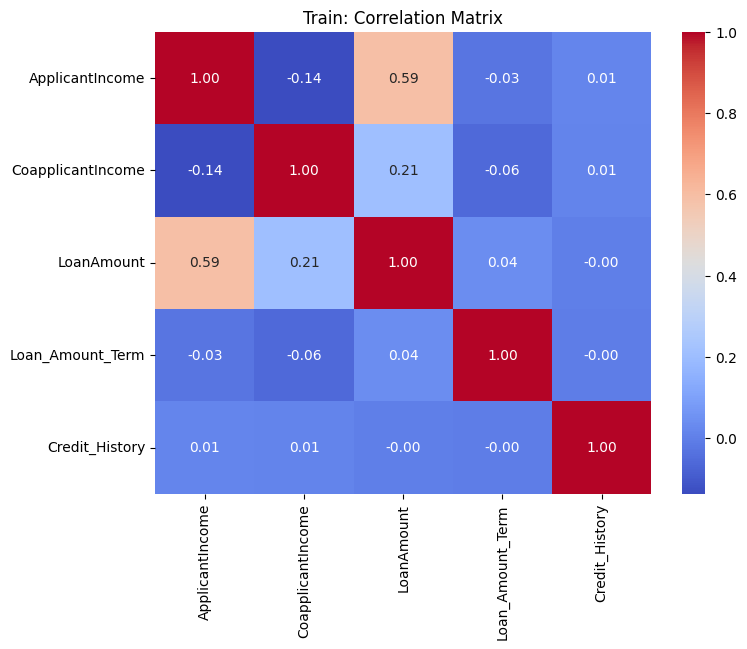


Cross-tabulation: Loan_Status vs Gender
Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.308765  0.691235

Cross-tabulation: Loan_Status vs Married
Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.281796  0.718204

Cross-tabulation: Loan_Status vs Dependents
Loan_Status         N         Y
Dependents                     
0            0.313889  0.686111
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059

Cross-tabulation: Loan_Status vs Education
Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940

Cross-tabulation: Loan_Status vs Self_Employed
Loan_Status           N         Y
Self_Employed                    
No             0.312030  0.687970
Yes            0.317073  0.682927

Cross-tabulation: Loan_Status vs Property_Area
Loan_Status     

In [24]:
# Task 2.4: Relationships with Loan_Status (Train only)
if 'Loan_Status' in df_train.columns:
    # Scatter plot: ApplicantIncome vs LoanAmount by Loan_Status
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', style='Loan_Status', data=df_train)
    plt.title('Train: ApplicantIncome vs LoanAmount by Loan_Status')
    plt.show()

    # Correlation matrix
    numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
    corr_matrix = df_train[numerical_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Train: Correlation Matrix')
    plt.show()

    # Cross-tabulation: Loan_Status vs categorical variables
    for col in categorical_cols[:-1]:  # Exclude Loan_Status
        print(f"\nCross-tabulation: Loan_Status vs {col}")
        print(pd.crosstab(df_train[col], df_train['Loan_Status'], normalize='index'))


# Task 2.5: Identify Trends, Anomalies, and Patterns
- Numerical Distributions: ApplicantIncome and LoanAmount are right-skewed, indicating most applicants have lower incomes and loan amounts.

- Categorical Insights: Loan_Status (train) shows a higher approval rate. Features like Education and Property_Area may influence outcomes. 

- Correlations: Check correlation matrix for relationships (e.g., ApplicantIncome and LoanAmount may be positively correlated).

- Anomalies: Outliers in ApplicantIncome and LoanAmount were capped at the 99th percentile to reduce their impact.

# Reporting and Insights

***Key Findings:***

- Missing values were imputed (median for numerical, mode for categorical).

- Numerical features show right-skewed distributions, suggesting a need for transformation (e.g., log) in modeling.

- Categorical features like Education and Property_Area have uneven distributions, potentially affecting loan approval.

- Credit_History likely has a strong correlation with Loan_Status (check cross-tabulation).

Recommendations:

- Transform skewed numerical features for modeling.

- Focus on Credit_History, Education, and Property_Area for feature engineering.

- Use train-test distribution comparisons to ensure model generalizability.